<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [ ]:
student_number = "401106096"
full_name = "Radin Shahdaei"
assert student_number and full_name is not None, 'please input your information'

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display a few samples
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [ ]:
# Display dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: The most irrelevant column would be the identifier column, which is CUST_ID.

In [ ]:
# Exclude the irrelevant feature
df = df.drop(columns=['CUST_ID'])

# Display the first few rows to confirm
df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


how do you handle missing data, and why did you choose this method?
<br>
Answer: There is one missing value in CREDIT_LIMIT, which we can drop. But, there are nearly 300 missing values in MINIMUM_PAYMENTS, which i will use mean imputation to fill the data.


In [ ]:
# Fill missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS with the column mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df = df.dropna()
# Confirm that there are no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT_LIMI

<ipython-input-7-4c3f207d39d8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)


plot the correlation matrix and identify redundant features.remove them from the dataframe.

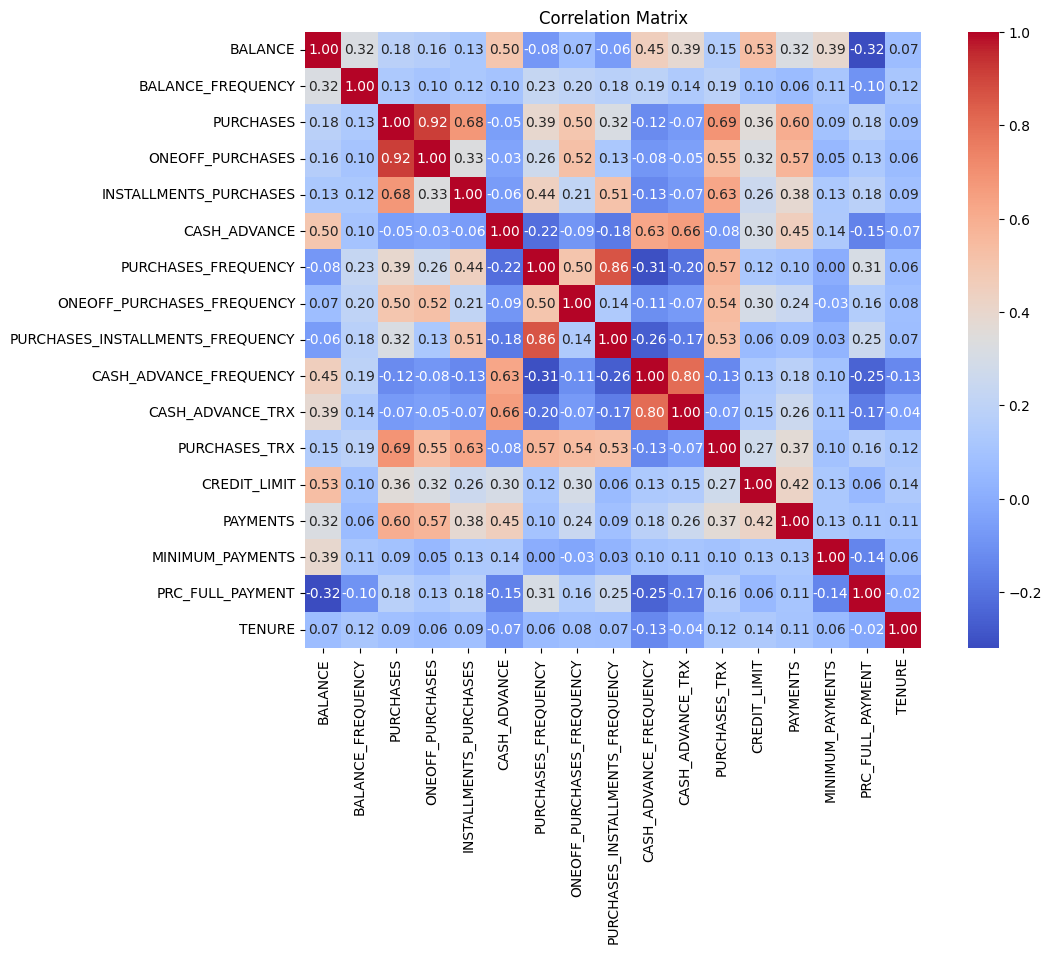

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Identify features with correlation greater than the threshold
threshold = 0.8
corr_matrix = df.corr()

# Create a set to hold features to drop
to_drop = set()

# Find and collect features that are highly correlated
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Compare the absolute correlation
            colname = corr_matrix.columns[i]  # Get the name of the column
            to_drop.add(colname)  # Add to set of columns to drop

# Drop the redundant features from the DataFrame
df = df.drop(columns=to_drop)

# Display the remaining features
print("Removed features:", to_drop)
print("Remaining features:", df.columns.tolist())


Removed features: {'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES'}
Remaining features: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the dataset (excluding the target variable if present)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the standardized data
df_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.349114,-0.466805,-0.806649,-0.678716,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.310993,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.454607,2.605438,-1.221928,-0.678716,0.573949,0.110032,-0.591841,0.688601,0.818546,0.089265,0.234159,0.360541
2,0.447041,0.517980,-0.107716,-0.454607,-0.466805,1.269742,2.673295,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101699,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,-0.454607,-0.368678,-1.014290,-0.399383,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.000041,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.454607,-0.466805,-1.014290,-0.399383,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.265819,-0.525588,0.360541


Why is it important to standardize the data before applying PCA?
<br>
Answer:
Standardizing data before applying PCA ensures that all features contribute equally by removing scale bias. Also, centerizing should be done before applying PCA, as it is assumed that the features have zero mean when calculating the COV matrix.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer: Normalizer scales individual samples to unit norm, while the StandardScaler standardizes features by centering them around zero with unit variance; for PCA, StandardScaler is preferred as it preserves the data distribution.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [ ]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Store components
        if self.n_components is not None:
            self.components = eigenvectors[:, :self.n_components]
        else:
            self.components = eigenvectors

        # Calculate explained variance ratio
        self.explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

        # Debugging information
        # print("Eigenvalues:\n", eigenvalues)
        # print("Eigenvectors (first few):\n", eigenvectors[:, :5])
        # print("Selected Components (first few):\n", self.components[:, :5])

    def transform(self, X):
        X_centered = X - self.mean
        transformed_data = X_centered @ self.components

        # Debugging information
        print("Transformed Data Shape:", transformed_data.shape)
        return transformed_data

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio

    def get_components(self):
        return self.components


### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:

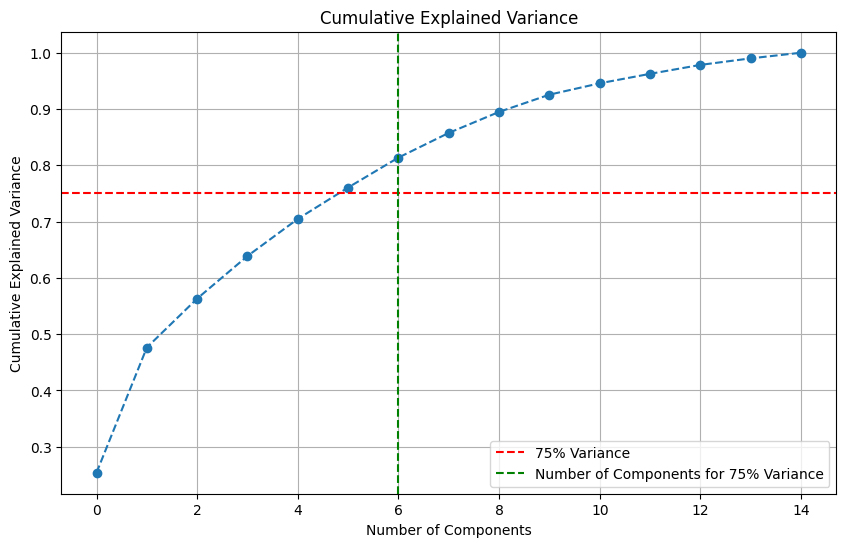

6

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already fit the CustomPCA model
pca = CustomPCA()
pca.fit(df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.get_explained_variance_ratio())

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.75, color='r', linestyle='--', label='75% Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.75) + 1, color='g', linestyle='--', label='Number of Components for 75% Variance')
plt.legend()
plt.grid()
plt.show()

# Determine the number of components needed to explain 75% of the variance
num_components_75 = np.argmax(cumulative_variance >= 0.75) + 1
num_components_75


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [ ]:
pca = CustomPCA(n_components=num_components_75)  # Use the number of components needed for 75% variance
pca.fit(df_scaled)

# Transform the data to the new PCA space
pca_data = pca.transform(df_scaled)

# Rename the columns appropriately if needed
pca_data.columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]

# Display the first few rows
print(pca_data.head())

pca_data.to_csv('pca_output.csv', index=False)


Transformed Data Shape: (8949, 6)
        PC1       PC2       PC3       PC4       PC5       PC6
0  1.728758  0.833702 -0.384100 -0.430752 -0.116079  0.489324
1  0.313544 -2.531324  0.615605 -0.916446 -0.838691  0.000245
2 -1.197035  0.883635 -1.176932  1.171512 -1.082223 -1.895008
3  0.904971 -0.001897 -0.237750 -1.355975 -0.437982 -0.778725
4  1.498927  0.526923 -0.787113 -0.089101 -0.274406  0.370136


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

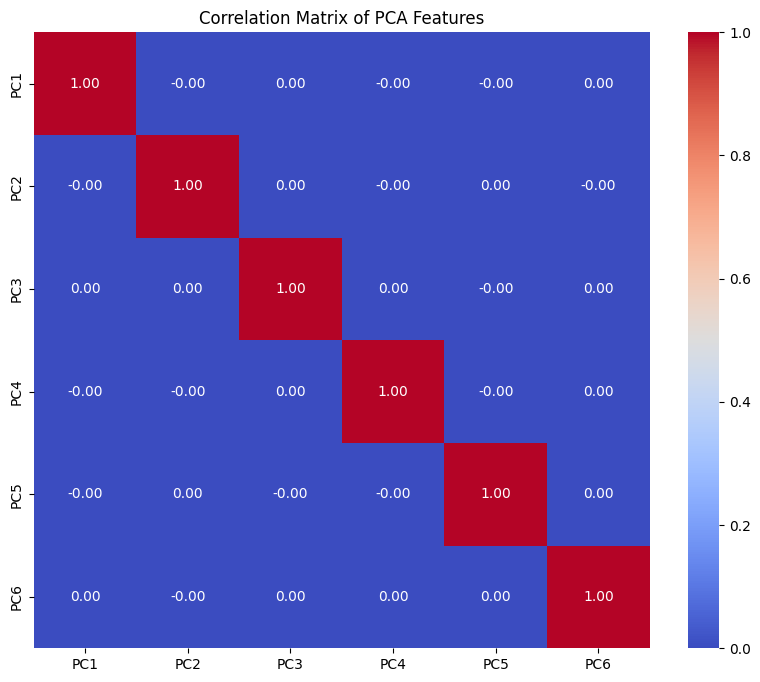

In [ ]:
# Calculate the correlation matrix of the PCA features
correlation_matrix_pca = pca_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pca, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of PCA Features")
plt.show()


## KMeans (45 points)
Implement kmeans from scratch.

In [ ]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)  # For reproducibility
        # Step 1: Initialize centroids by randomly selecting data points
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            # Step 2: Assign labels based on the closest centroid
            self.labels_ = self._assign_labels(X)
            # Step 3: Update centroids based on the mean of assigned points
            new_centroids = self._update_centroids(X)

            # Check for convergence (if centroids do not change)
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        # Calculate inertia
        self.inertia_ = self._calculate_inertia(X)

        return self

    def _assign_labels(self, X):
        """
        Assign labels to each data point based on the closest centroid.
        X: Input data (n_samples, n_features)
        Returns: labels (array of shape (n_samples,))
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)  # Calculate distances
        return np.argmin(distances, axis=1)  # Assign label based on closest centroid

    def _update_centroids(self, X):
        """
        Update centroids by calculating the mean of assigned points.
        X: Input data (n_samples, n_features)
        Returns: new centroids (array of shape (n_clusters, n_features))
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = X[self.labels_ == i].mean(axis=0)
        return new_centroids

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        inertia = 0.0
        for i in range(self.n_clusters):
            inertia += np.sum((X[self.labels_ == i] - self.centroids[i]) ** 2)
        return inertia


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

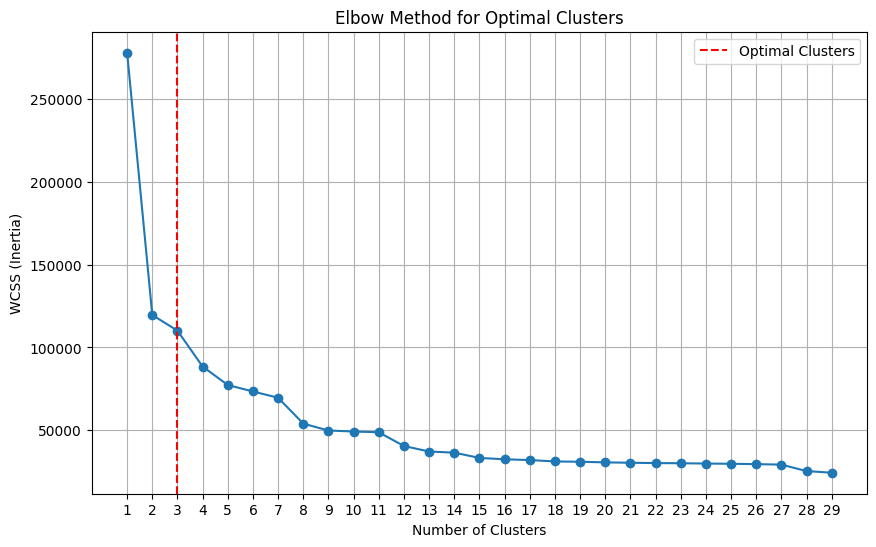

3

In [ ]:
# Ensure pca_data is in NumPy array format for KMeans
pca_array = pca_data.values  # Convert DataFrame to NumPy array

# Applying the Elbow Method to determine the optimal number of clusters
WCSS = []

# Loop over a range of cluster values (from 1 to 30) and compute inertia (WCSS)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(pca_array)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid()
plt.xticks(range(1, 30))
plt.axvline(x=np.argmin(np.diff(np.diff(WCSS))) + 2, color='r', linestyle='--', label='Optimal Clusters')
plt.legend()
plt.show()

# Determine the best number of clusters (look for the elbow point)
best_num_clusters = np.argmin(np.diff(np.diff(WCSS))) + 2  # Adding 2 due to the diff operation
best_num_clusters



Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [ ]:
# Initialize the CustomKMeans with the optimal number of clusters
optimal_kmeans = CustomKMeans(n_clusters=best_num_clusters, random_state=42)

# Fit the model to the PCA-transformed data
optimal_kmeans.fit(pca_array)

# Assign cluster labels to each observation
cluster_labels = optimal_kmeans.labels_

# Add a new column 'segment' to the pca_data DataFrame
pca_data['segment'] = cluster_labels

# Display the updated pca_data DataFrame with the new 'segment' column
print(pca_data.head())


        PC1       PC2       PC3       PC4       PC5       PC6  segment
0  1.728758  0.833702 -0.384100 -0.430752 -0.116079  0.489324        2
1  0.313544 -2.531324  0.615605 -0.916446 -0.838691  0.000245        0
2 -1.197035  0.883635 -1.176932  1.171512 -1.082223 -1.895008        1
3  0.904971 -0.001897 -0.237750 -1.355975 -0.437982 -0.778725        2
4  1.498927  0.526923 -0.787113 -0.089101 -0.274406  0.370136        1


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

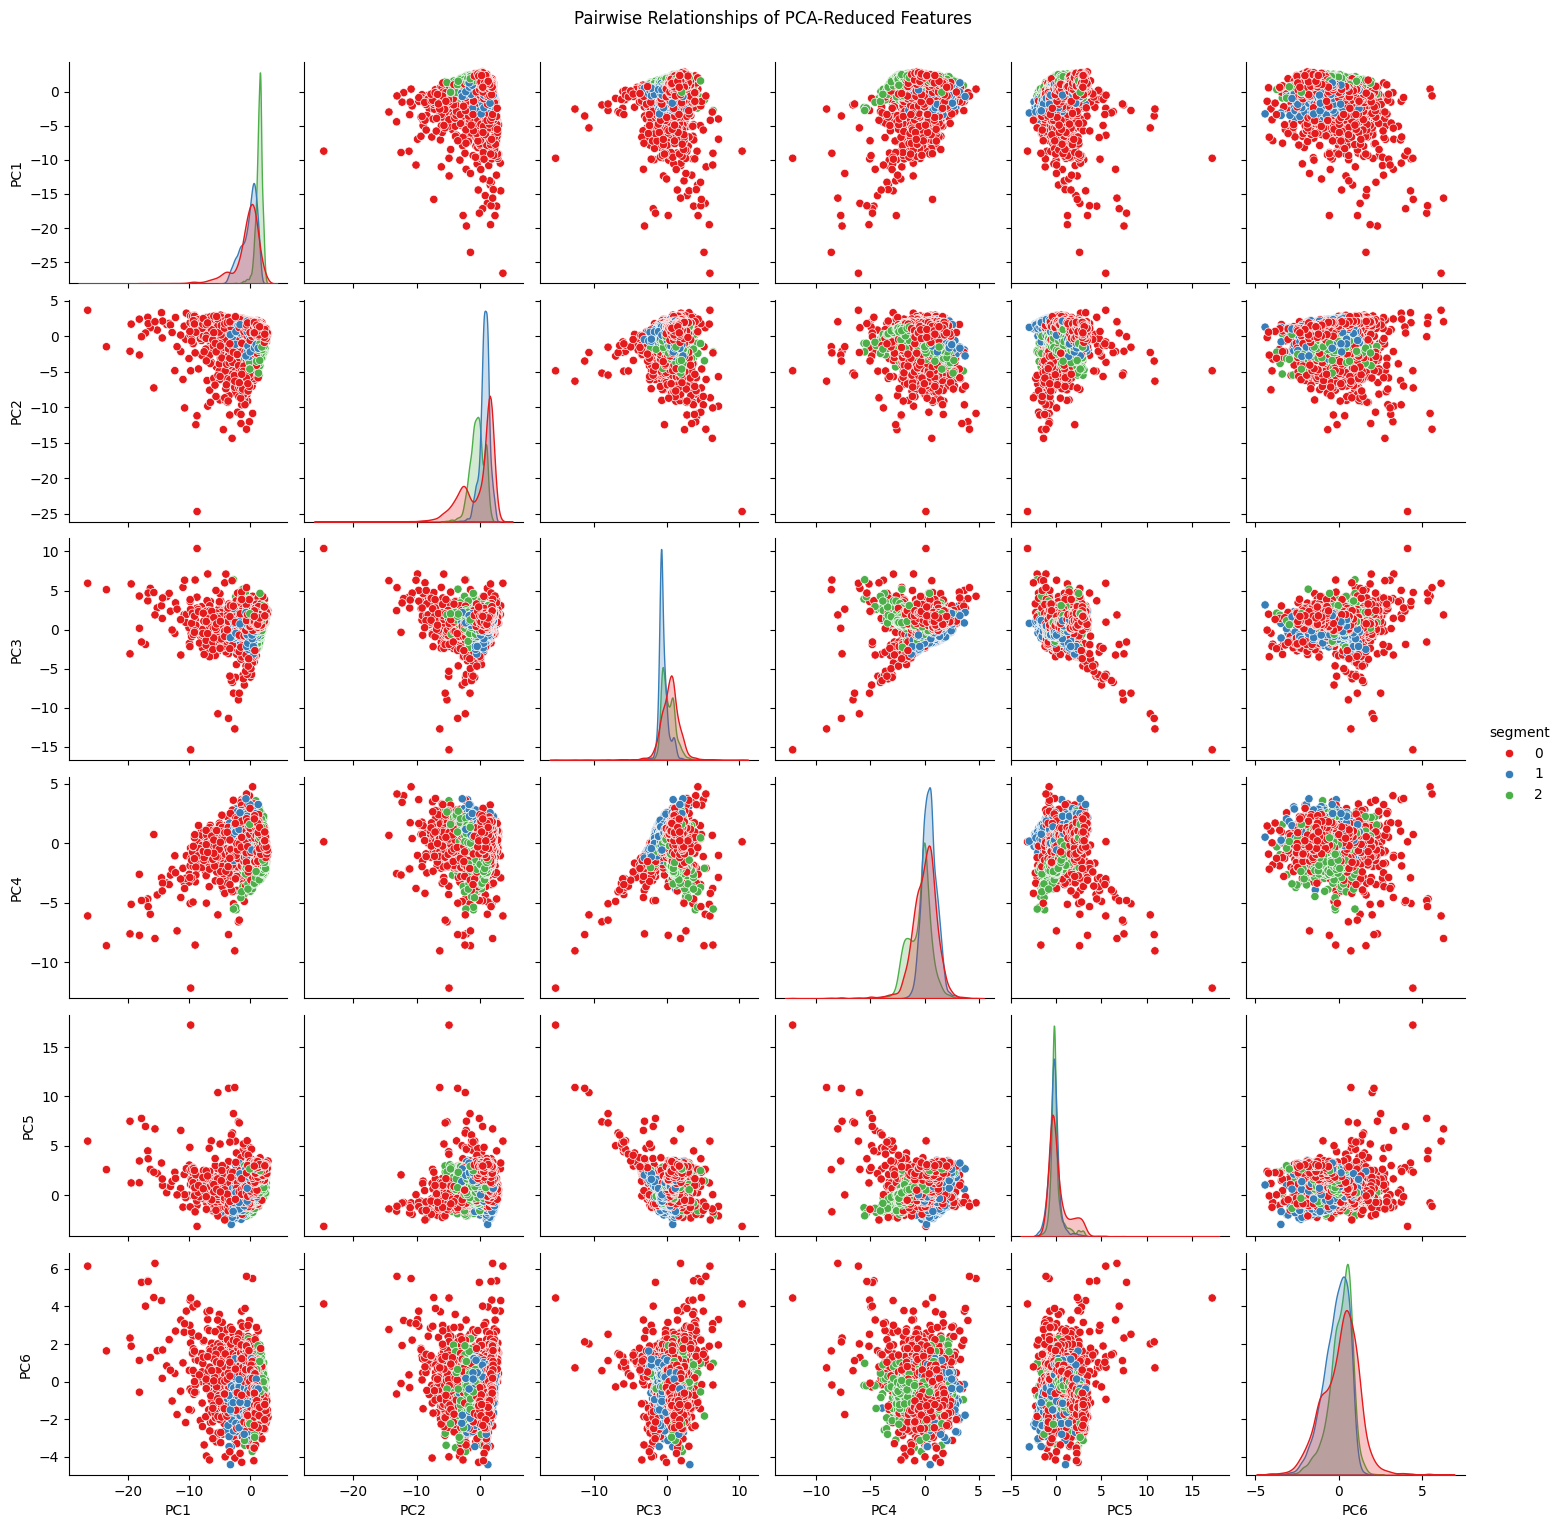

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_data now includes the 'segment' column for cluster labels
# Create a pairplot of the PCA-reduced features, colored by the 'segment' labels
sns.pairplot(pca_data, hue='segment', palette='Set1', diag_kind='kde')

# Set the title
plt.suptitle("Pairwise Relationships of PCA-Reduced Features", y=1.02)
plt.show()


So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


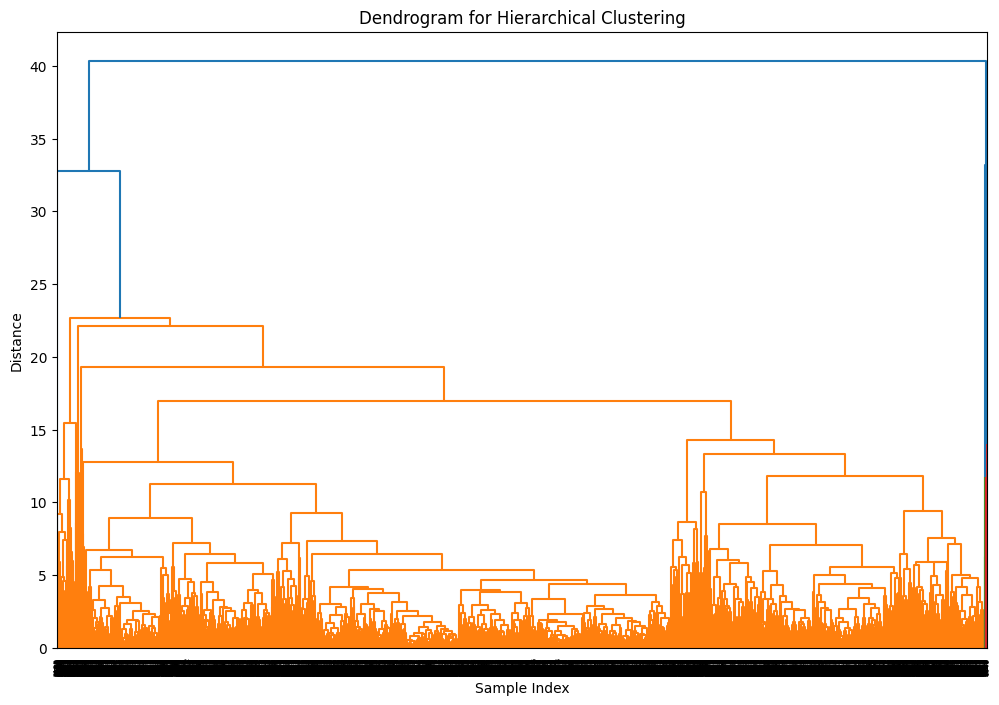

In [ ]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering using the complete linkage method
linkage_matrix = sch.linkage(pca_array, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

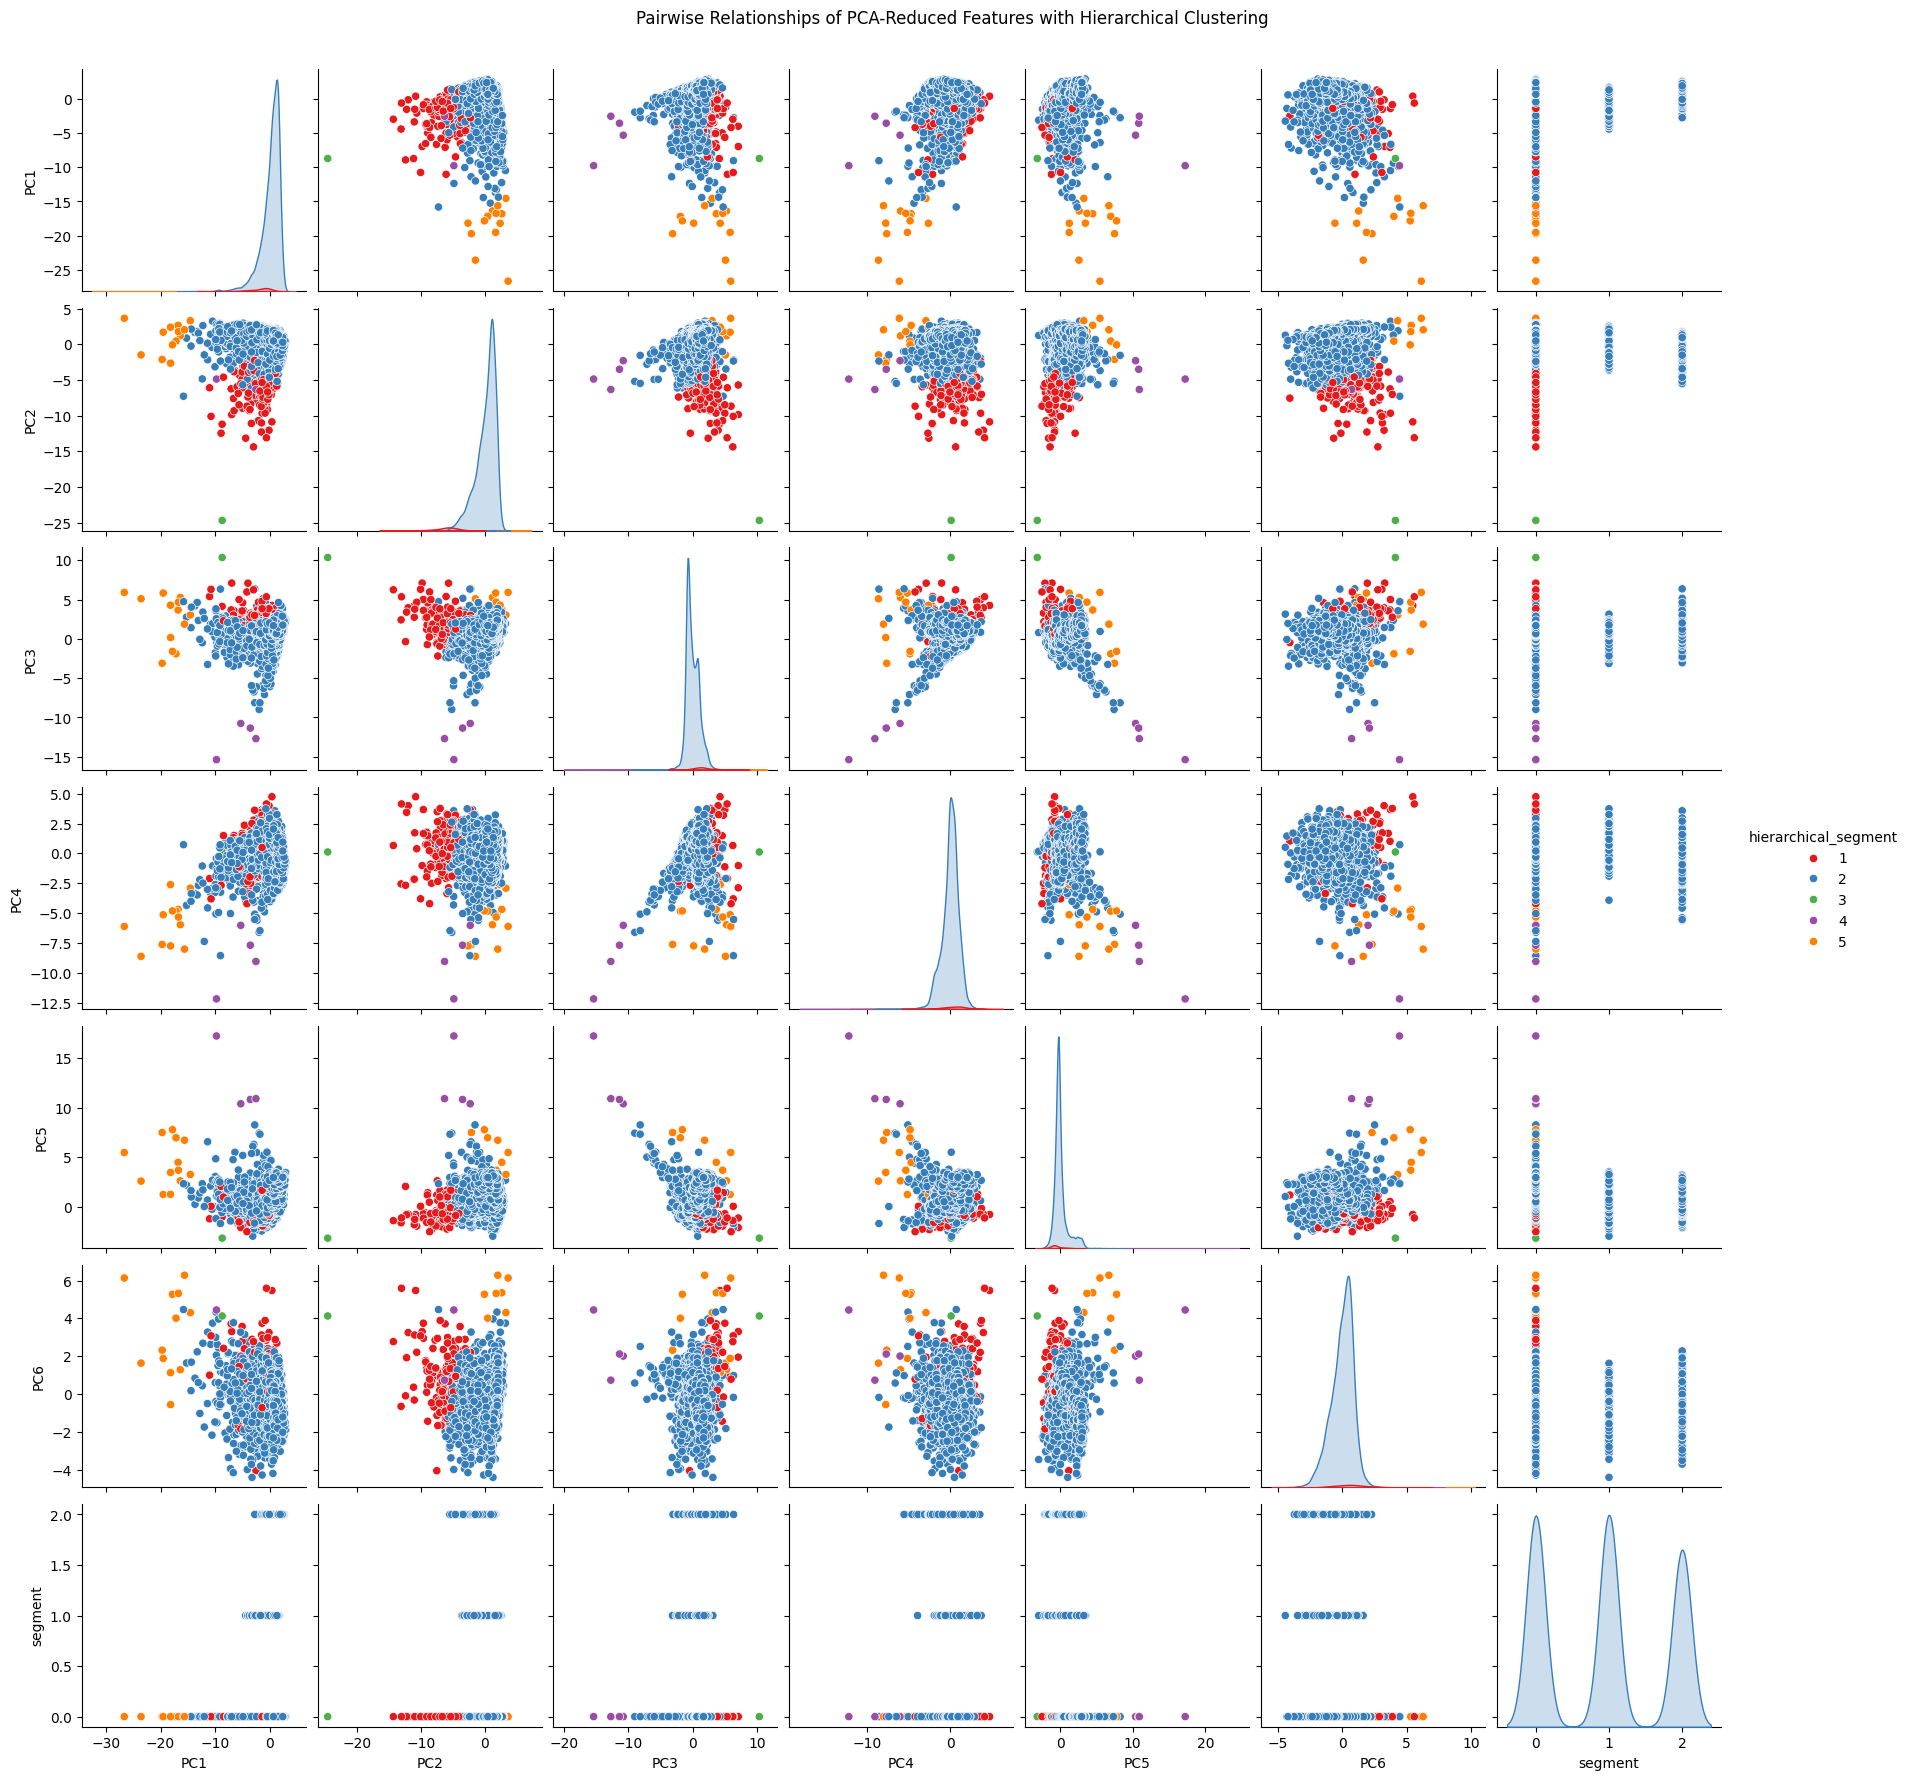

In [ ]:
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering using the complete linkage method
linkage_matrix = sch.linkage(pca_array, method='complete')

# Assign clusters using fcluster with a specified number of clusters (5)
cluster_labels = sch.fcluster(linkage_matrix, t=5, criterion='maxclust')

# Add the cluster labels to the pca_data DataFrame
pca_data['hierarchical_segment'] = cluster_labels

# Visualize the clustering results using pairplots
sns.pairplot(pca_data, hue='hierarchical_segment', palette='Set1', diag_kind='kde')

# Set the title
plt.suptitle("Pairwise Relationships of PCA-Reduced Features with Hierarchical Clustering", y=1.02)
plt.show()
